### Gather data and load in file into data


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
import plotly.express as px

# load data into dataframe using pandas
df_cardio_base = pd.read_csv(r'c:\users\HP\Turing_env\cardio_base.csv')
df_cardio_alco = pd.read_csv(r'c:\users\HP\Turing_env\cardio_alco.csv', sep = ';')
df_covid_data = pd.read_csv(r'c:\users\HP\Turing_env\covid_data.csv')


### covid_data quality Assessment

In [90]:
df_covid_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [91]:
df_covid_data.shape

(23082, 8)

In [92]:
df_covid_data.sample(10)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
14937,Netherlands,2020-04-08,777,234,1.713487e+07,18.779,48472.545,3.32
12860,Macedonia,2020-05-11,20,0,2.083380e+06,13.260,13111.214,4.28
7276,Finland,2020-04-15,97,5,5.540718e+06,21.228,40585.721,3.28
8590,Guam,2020-04-03,5,0,1.687830e+05,9.551,NaN,NaN
6087,Dominican Republic,2020-05-15,124,13,1.084790e+07,6.981,14600.861,1.60
7192,Finland,2020-01-22,0,0,5.540718e+06,21.228,40585.721,3.28
10493,Isle of Man,2020-05-10,1,0,8.503200e+04,NaN,NaN,NaN
9773,India,2020-05-14,3722,134,1.380004e+09,5.989,6426.674,0.53
20392,Taiwan,2020-01-22,0,0,2.381678e+07,NaN,NaN,NaN
9052,Guyana,2020-05-12,5,0,7.865590e+05,5.305,7435.047,1.60


In [93]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


date column is an object dtype instead of datetime format.



In [94]:
df_covid_data.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [95]:
df_covid_data.isnull().any()

location                      False
date                          False
new_cases                     False
new_deaths                    False
population                     True
aged_65_older_percent          True
gdp_per_capita                 True
hospital_beds_per_thousand     True
dtype: bool

##### Investigate missing value in population column


In [96]:
from pprint import pprint 

## further investigation into null values in each of the column
null_population_rows = df_covid_data[df_covid_data['population'].isnull()]

pprint(null_population_rows)

            location        date  new_cases  new_deaths  population  \
23018  International  2019-12-31          0           0         NaN   
23019  International  2020-01-01          0           0         NaN   
23020  International  2020-01-02          0           0         NaN   
23021  International  2020-01-03          0           0         NaN   
23022  International  2020-01-04          0           0         NaN   
...              ...         ...        ...         ...         ...   
23077  International  2020-02-28          0           0         NaN   
23078  International  2020-02-29          0           2         NaN   
23079  International  2020-03-01          0           0         NaN   
23080  International  2020-03-02          0           0         NaN   
23081  International  2020-03-10         -9           1         NaN   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
23018                    NaN             NaN                         NaN

In [97]:
## displaying unique location values in the null_population_rows
unique_population_row = null_population_rows['location'].unique()

print(unique_population_row)

['International']


_The null population row in the unique to the internation row in the location column. This suggest that it contains other country that is not accounted for in cummulation._

##### investigate missing value in aged_65_older_percent

In [98]:
from pprint import pprint 

## further investigation into null values in each of the column
null_65_older_rows = df_covid_data[df_covid_data['aged_65_older_percent'].isnull()]
pprint(null_65_older_rows)

            location        date  new_cases  new_deaths  population  \
405          Andorra  2020-03-03          1           0     77265.0   
406          Andorra  2020-03-14          1           0     77265.0   
407          Andorra  2020-03-16          3           0     77265.0   
408          Andorra  2020-03-17          9           0     77265.0   
409          Andorra  2020-03-18          0           0     77265.0   
...              ...         ...        ...         ...         ...   
23077  International  2020-02-28          0           0         NaN   
23078  International  2020-02-29          0           2         NaN   
23079  International  2020-03-01          0           0         NaN   
23080  International  2020-03-02          0           0         NaN   
23081  International  2020-03-10         -9           1         NaN   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
405                      NaN             NaN                         NaN

In [99]:
## displaying unique location values in the null_population_rows
unique_65_older_row = null_65_older_rows['population'].unique()

print(unique_65_older_row)

[7.7265000e+04 1.5002000e+04 6.2273000e+04 2.6221000e+04 3.0237000e+04
 6.5720000e+04 7.1991000e+04 4.8865000e+04 3.4830000e+03 3.3691000e+04
 5.6772000e+04 6.7052000e+04 8.5032000e+04 1.0107300e+05 1.9327740e+06
 3.8137000e+04 3.9244000e+04 4.9990000e+03 5.7557000e+04 5.3192000e+04
 3.3938000e+04 4.2882000e+04 1.7500657e+07 2.3816775e+07 3.8718000e+04
 8.0900000e+02 5.9733000e+05           nan]


_there are over 2439 empty rows in the "aged_65_older_percent" column, which is signicant

_I will ignore the data for now until the analysis decide otherwise_



#### other columns with null values is not signicant for this analysis.

In [100]:
df_covid_data.duplicated().all()

np.False_

In [101]:
df_covid_data.duplicated().any()

np.False_

## cardio_base Assessment

In [102]:
df_cardio_base.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
56604,80797,20871,1,155,72.0,120,80,1,0
10376,14812,16868,1,164,83.0,120,80,1,0
37591,53671,22045,1,163,71.0,120,80,1,0
55567,79285,23113,1,160,86.0,130,90,1,0
17985,25694,19785,2,187,84.0,120,80,1,0
62656,89464,18054,1,165,59.0,95,54,1,0
51884,73988,18337,2,174,78.0,100,70,1,0
393,559,18282,1,163,108.0,150,100,3,0
14494,20717,21275,2,175,64.0,110,80,1,0
5515,7845,21769,1,154,78.0,140,80,1,0


In [103]:
df_cardio_base.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [104]:
df_cardio_base.shape

(70000, 9)

In [105]:
df_cardio_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [106]:
df_cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [107]:
df_cardio_base.isna().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
smoke          False
dtype: bool

In [108]:
df_cardio_base.duplicated().sum()

np.int64(0)

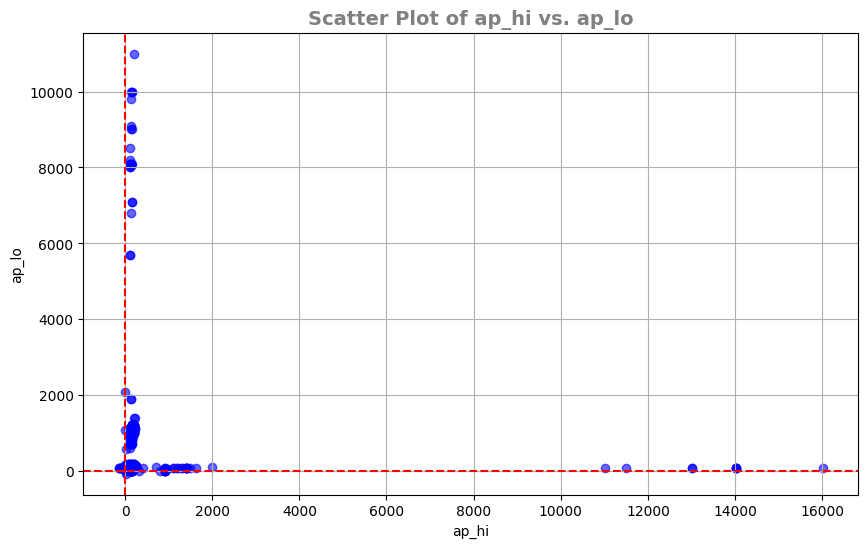

In [109]:
# Create a scatter plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_cardio_base['ap_hi'], df_cardio_base['ap_lo'], color='blue', alpha=0.6)
plt.title('Scatter Plot of ap_hi vs. ap_lo', fontsize=14, weight='bold', color='grey')
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')
plt.axhline(y=0, color='red', linestyle='--')  # Optional: horizontal line for reference
plt.axvline(x=0, color='red', linestyle='--')  # Optional: vertical line for reference
plt.grid(True)
plt.show()

In [110]:
## using z_score to calculate the presence of outlier in this table for further looking into the data.

from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df_cardio_base['ap_lo'])
outliers_z = df_cardio_base[(z_scores > 3) | (z_scores < -3)]

print(f"Outliers in 'ap_lo' using Z-score:\n\n {outliers_z}")

Outliers in 'ap_lo' using Z-score:

           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
228      314  17489       2     183    98.0    160   1100            1      1
241      334  21932       2     157    60.0    160   1000            2      0
260      357  18217       1     150    83.0    140    800            1      0
329      458  23407       1     176    63.0    160   1000            2      0
345      482  18704       1     154    81.0    140   1000            2      0
...      ...    ...     ...     ...     ...    ...    ...          ...    ...
69771  99659  23330       1     167    81.0    160   1000            1      0
69872  99798  21808       1     152    56.0    160   1000            1      0
69878  99807  21239       2     168    95.0    160   1000            1      0
69885  99816  22417       2     166    78.0    170   1000            1      0
69967  99955  21416       2     168    63.0    140   1000            1      0

[951 rows x 9 columns]


## Cardio_alco  Assessment

In [111]:
df_cardio_alco.head(5)

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [112]:
df_cardio_alco.shape

(56903, 2)

In [113]:
df_cardio_alco.describe()

,id,alco
count,56903.000000,56903.000000
mean,48472.162065,0.053442
std,30994.121701,0.224915
min,44.000000,0.000000
25%,20401.000000,0.000000
50%,40763.000000,0.000000
75%,77109.500000,0.000000
max,99954.000000,1.000000


In [114]:
df_cardio_alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB


In [115]:
def check_duplicate(data):
    duplicate_count = data.duplicated().sum()
    return duplicate_count

In [116]:
check_duplicate(df_cardio_base)

np.int64(0)

### Quality issue and observation

#### df_covid_data
- The new_deaths and new_cases column contains -ve value
- Presence of null value in the population, age_65_older_percent, gbp_per_capita, hospital_beds_per_thousand
- The date column is in object datatype
- The population column is in float dtype

#### df_cardio_base

- ap_hi and ap_low columns contains -ve value, which is not logical for blood pressure measureement
- age column is represented in days mot in years.
- Outrageous value for ap_hi and ap_lo columns. This indicate the presence of outliers in this columns.

#### df_cardio_alco

- this table is an extension of cardio_base table. It documents the alcohol intake of entities.

In [117]:
## duplicate dataframe for cleaning
covid_data_clean = df_covid_data.copy()
cardio_base_clean = df_cardio_base.copy()
cardio_alco_clean = df_cardio_alco.copy()

In [118]:
covid_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


#### wrangling covid_data_clean

In [119]:
## drop empty row with all column empty
covid_data_clean.dropna(how='all', inplace=True)

## test
covid_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [120]:

# Inspect rows with null values in specified columns
null_rows = covid_data_clean[covid_data_clean[['population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']].isnull().any(axis=1)]

# Display the result
print(null_rows)

            location        date  new_cases  new_deaths  population  \
405          Andorra  2020-03-03          1           0     77265.0   
406          Andorra  2020-03-14          1           0     77265.0   
407          Andorra  2020-03-16          3           0     77265.0   
408          Andorra  2020-03-17          9           0     77265.0   
409          Andorra  2020-03-18          0           0     77265.0   
...              ...         ...        ...         ...         ...   
23077  International  2020-02-28          0           0         NaN   
23078  International  2020-02-29          0           2         NaN   
23079  International  2020-03-01          0           0         NaN   
23080  International  2020-03-02          0           0         NaN   
23081  International  2020-03-10         -9           1         NaN   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
405                      NaN             NaN                         NaN

In [121]:
# convert the nan value in the population column to 0 and change the dtype to int.

covid_data_clean['population'] = covid_data_clean['population'].fillna(0).astype(int)

#test
print(covid_data_clean['population'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 23082 entries, 0 to 23081
Series name: population
Non-Null Count  Dtype
--------------  -----
23082 non-null  int64
dtypes: int64(1)
memory usage: 180.5 KB
None


In [122]:
# Count number of values in column 'new_deaths' that are less than 0
count_less_than_zero = (covid_data_clean['new_deaths'] < 0).sum()

#test
print(f"Number of values less than 0 in column 'new_deaths': {count_less_than_zero}")

Number of values less than 0 in column 'new_deaths': 2


In [123]:
# Count number of values in column 'new_cases' that are less than 0
count_less_than_zero = (covid_data_clean['new_cases'] < 0).sum()

# test
print(f"Number of values less than 0 in column 'new_cases': {count_less_than_zero}")

Number of values less than 0 in column 'new_cases': 14


In [124]:
# create a new df for cardio_data without new_cases < 0
covid_data_clean = covid_data_clean[covid_data_clean['new_cases'] >= 0]

# test
count_less_than_zero = (covid_data_clean['new_cases'] < 0).sum()
print(f"Number of values less than 0 in column 'new_cases': {count_less_than_zero}")

Number of values less than 0 in column 'new_cases': 0


In [125]:
# create a new df for cardio_data without new_deaths < 0
covid_data_clean = covid_data_clean[covid_data_clean['new_deaths'] >= 0]

# test
count_less_than_zero = (covid_data_clean['new_deaths'] < 0).sum()
print(f"Number of values less than 0 in column 'new_deaths': {count_less_than_zero}")

Number of values less than 0 in column 'new_deaths': 0


In [126]:
# standardize the date column to datetime format (YYYY-MM-DD)

covid_data_clean['date'] = pd.to_datetime(covid_data_clean['date'], format='%Y-%m-%d')

# test
print(covid_data_clean['date'].dtype)

datetime64[ns]


In [127]:
covid_data_clean.describe()

,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23067,23067.000000,23067.000000,2.306700e+04,20630.000000,20697.000000,19130.000000
mean,2020-04-10 01:40:52.906749952,625.466771,35.695019,1.034627e+08,9.757235,22708.250406,3.205123
min,2019-12-31 00:00:00,0.000000,0.000000,0.000000e+00,1.144000,661.240000,0.100000
25%,2020-03-18 00:00:00,0.000000,0.000000,2.078932e+06,3.853000,6426.674000,1.400000
50%,2020-04-16 00:00:00,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,2020-05-14 00:00:00,55.000000,1.000000,3.346920e+07,15.168000,35220.084000,4.210000
max,2020-06-10 00:00:00,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000
std,NaN,5519.007781,330.826505,6.709949e+08,6.444802,21190.657817,2.594131


In [128]:
covid_data_clean.isnull().any()

location                      False
date                          False
new_cases                     False
new_deaths                    False
population                    False
aged_65_older_percent          True
gdp_per_capita                 True
hospital_beds_per_thousand     True
dtype: bool

## Wrangle the cardio_base dataframe

In [129]:
cardio_base_clean.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [130]:
# Identify rows with empty or negative values from 'ap_hi' and 'ap_lo'
invalid_rows = cardio_base_clean[(cardio_base_clean['ap_hi'] < 0) | 
                                 (cardio_base_clean['ap_lo'] < 0) | 
                                 cardio_base_clean[['ap_hi', 'ap_lo']].isnull().any(axis=1)]

# Test before dropping the invalid rows
for idx, row in cardio_base_clean.iterrows():
    if row.equals(invalid_rows.loc[idx]) if idx in invalid_rows.index else False:
        print("there is invalid_rows")
        break
    else:
        pass

there is invalid_rows


In [131]:
# Drop invalid rows in place from cardio_base_clean
cardio_base_clean.drop(invalid_rows.index, inplace=True)


In [132]:
# Test for rows in invalid_rows after dropping them
invalid_found = False  # Flag to track if invalid rows are found

for idx, row in cardio_base_clean.iterrows():
    if row.equals(invalid_rows.loc[idx]) if idx in invalid_rows.index else False:
        print("there is invalid_rows")
        invalid_found = True
        break  

# Only print if invalid rows were dropped
if not invalid_found:
    print("negative and empty rows dropped")




negative and empty rows dropped


In [133]:
## convert age column to count from days to years

cardio_base_clean['age'] = (cardio_base_clean['age'] / 365).astype(int)

# Test
cardio_base_clean['age'].sample(5)

28351    42
57730    63
39306    49
4110     44
62091    58
Name: age, dtype: int64

In [134]:
cardio_base_clean.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000
mean,49973.395702,52.840696,1.349554,164.359384,74.206485,128.843868,96.634601,1.366885,0.088139
std,28851.700988,6.766341,0.476833,8.210423,14.395726,153.999302,188.482151,0.680272,0.283498
min,0.000000,29.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50003.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74890.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [135]:
cardio_alco_clean.drop_duplicates()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


## Merged the cardio_base_clean with cardio_alco_clean

In [136]:
merged_cardio = pd.merge(cardio_base_clean, cardio_alco_clean, on= 'id', how='inner')

merged_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56896 entries, 0 to 56895
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56896 non-null  int64  
 1   age          56896 non-null  int64  
 2   gender       56896 non-null  int64  
 3   height       56896 non-null  int64  
 4   weight       56896 non-null  float64
 5   ap_hi        56896 non-null  int64  
 6   ap_lo        56896 non-null  int64  
 7   cholesterol  56896 non-null  int64  
 8   smoke        56896 non-null  int64  
 9   alco         56896 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.3 MB


In [137]:
merged_cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,40,1,159,60.0,110,70,1,0,0
1,45,56,1,160,73.0,130,85,1,0,0
2,46,60,2,173,82.0,140,90,3,0,0
3,47,55,1,163,55.0,120,80,1,0,0
4,49,50,2,175,95.0,120,80,1,0,0


### ANALYSIS

##### Questions

- 1) How much heavier is the age group with the highest average weight than age group with the lowest weight?
- 2) Do people over 50 have higher cholesterol level than the rest?
- 3) Are men likely to be smoker than women
- 4) How tall are the tallest 1% of people?
- 5) which two feature have the highest spearman rank correlation?
- 6) % people that are more than 2 standard deviation far from the average height?
- 7) What % of the population was 50 years old consume alcohol consumption information
- 8) Which of the following statements is true with 95% confidence?
- 9) When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?
- 10) Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases   as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?
- 11) Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.
- 12) What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!
- 13) What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants

#### 1) How much heavier is the age group with the highest average weight than age group with the lowest weight?

In [138]:
# group by age and calculate the mean weight for each age class

age_group_weight_mean = cardio_base_clean.groupby('age')['weight'].mean()

# difference between the higest and the lowest mean weight
max_avg_weight = age_group_weight_mean.max()
min_avg_weight = age_group_weight_mean.min()

weight_diff = max_avg_weight  - min_avg_weight 

print(F"the diff btw min and max average weight within an age_group is: {weight_diff}")

the diff btw min and max average weight within an age_group is: 16.87989031078611


In [139]:
## fractional/ percentage difference between the max_avg_weight and min_avg_weight 

perc_diff = (weight_diff / min_avg_weight) * 100
frac_diff = weight_diff / min_avg_weight

print(f"% difference is: {perc_diff:.2f}%\nfrac difference is: {frac_diff:.2f}")

% difference is: 28.61%
frac difference is: 0.29


 ####  2) Do people over 50 have higher cholesterol level than the rest?

In [140]:
# Create two groups based on age
over_50 = cardio_base_clean[cardio_base_clean['age'] > 50]
under_50 = cardio_base_clean[cardio_base_clean['age'] <= 50]

# Compare the average cholesterol levels
mean_over_50 = over_50['cholesterol'].mean()
mean_under_50 = under_50['cholesterol'].mean()

print(f"Average cholesterol for people > 50: {mean_over_50}\n\nAverage cholesterol for people <= 50: {mean_under_50}")


Average cholesterol for people > 50: 1.4313989111987833

Average cholesterol for people <= 50: 1.2479996750741238


In [141]:
# t-test to see if the difference is statistically significant
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(over_50['cholesterol'], under_50['cholesterol'])

print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 34.34460725310023, P-value: 2.329564706531928e-256


p-value < 0.05. Therefore, statiscally, this difference is significant as the point of doing t-test is to see if the correlation is applicable. 

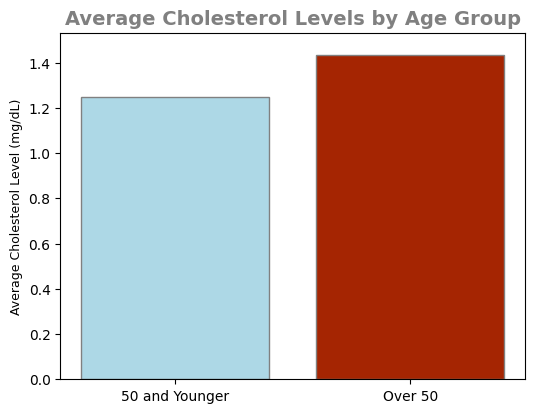

In [142]:
# Prepare data for the bar chart
categories = ['50 and Younger', 'Over 50']
means = [mean_under_50,mean_over_50]

# Create a bar chart
fig, ax = plt.subplots(figsize=(6, 4.5))
bars = ax.bar(categories, means, color=['lightblue', '#A52502'], edgecolor='grey')

# Add labels and title
ax.set_ylabel('Average Cholesterol Level (mg/dL)', fontsize=9)
ax.set_title('Average Cholesterol Levels by Age Group', fontsize=14, weight='bold', color='grey')
ax.set_ylim(0, max(means)+ 0.1)  # Set y-axis limit with some padding

# data labels 
'''for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0, f"{yval:.1f}", ha='center', va='bottom', fontsize=12)'''
plt.show()

#### 3) Are men likely to be smoker than women

gender
1    0.017858
2    0.218916
Name: smoke, dtype: float64


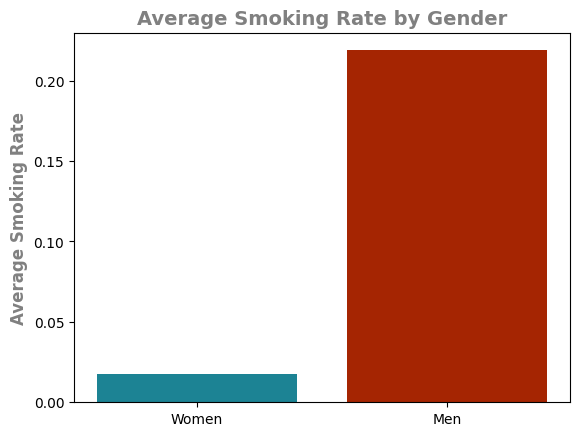

In [143]:
avg_smoker_by_gender = cardio_base_clean.groupby('gender')['smoke'].mean()

print(avg_smoker_by_gender)

# Gender labels (assuming 1 = Female and 2 = Male)
labels = ['Women', 'Men']

# Plotting a bar chart visual that shows disparity.
plt.bar(labels, avg_smoker_by_gender, color=['#1C8394', '#A52502'])
plt.title("Average Smoking Rate by Gender", fontsize=14, weight='bold', color='grey')
plt.ylabel("Average Smoking Rate", fontsize=12, weight='bold', color='grey')
plt.show()

#### 4) How tall are the tallest 1% of people?

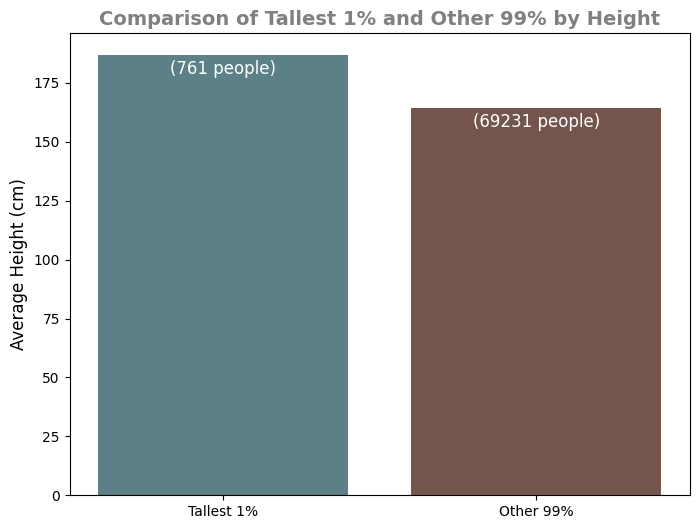

The shortest of 1% tallest is 184.0cm by height
The tallest of the 1% tallest is 250cm by height
the tallest 1% population is  22.57cm taller that the rest of group on average


In [144]:
# the 1% is the poulation >= 99th quantile by height

height_data = cardio_base_clean['height']

# Identify the threshold for the tallest 1%
Q99_value = cardio_base_clean.height.quantile(0.99)

# label parameters
tallest_1_percent = height_data[height_data >= Q99_value]
rest_of_people = height_data[height_data < Q99_value]
labels = ['Tallest 1%', 'Other 99%']
heights = [tallest_1_percent.mean(), rest_of_people.mean()]
sizes = [len(tallest_1_percent), len(rest_of_people)]

plt.figure(figsize=(8, 6))

bars = plt.bar(labels, heights, color=['#154B52','#390D02'], alpha=0.7)

# Add annotations to show the average height and group size
for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 8,
             f'{bar.get_height():.1f} cm\n({size} people)',
             ha='center', color='white', fontsize=12)

# Add labels and title
plt.ylabel('Average Height (cm)', fontsize=12)
plt.title('Comparison of Tallest 1% and Other 99% by Height', fontsize=14, weight='bold', color='grey')
plt.show()

# more details 
print(f'The shortest of 1% tallest is {Q99_value}cm by height\nThe tallest of the 1% tallest is {max(tallest_1_percent)}cm by height')
diff_avg_both_group = (tallest_1_percent.mean() - rest_of_people.mean())
print(F'the tallest 1% population is {diff_avg_both_group: .2f}cm taller that the rest of group on average')

In [145]:
print(tallest_1_percent.mean())

print(rest_of_people.mean())

186.68068331143232
164.11402406436423


#### 5) which two feature have the highest spearman rank correlation?

A spearman rank correlation is statistical approach used to measure the monotonic directional relationship between two variables X and Y. It is a single directional measure of Y: if Y is increasing or stay flat with respect to change in x. or decreasing or stay flat with respect X.

The features with the highest Spearman rank correlation are: ('ap_hi', 'ap_lo')
The Spearman rank correlation value is: 0.74


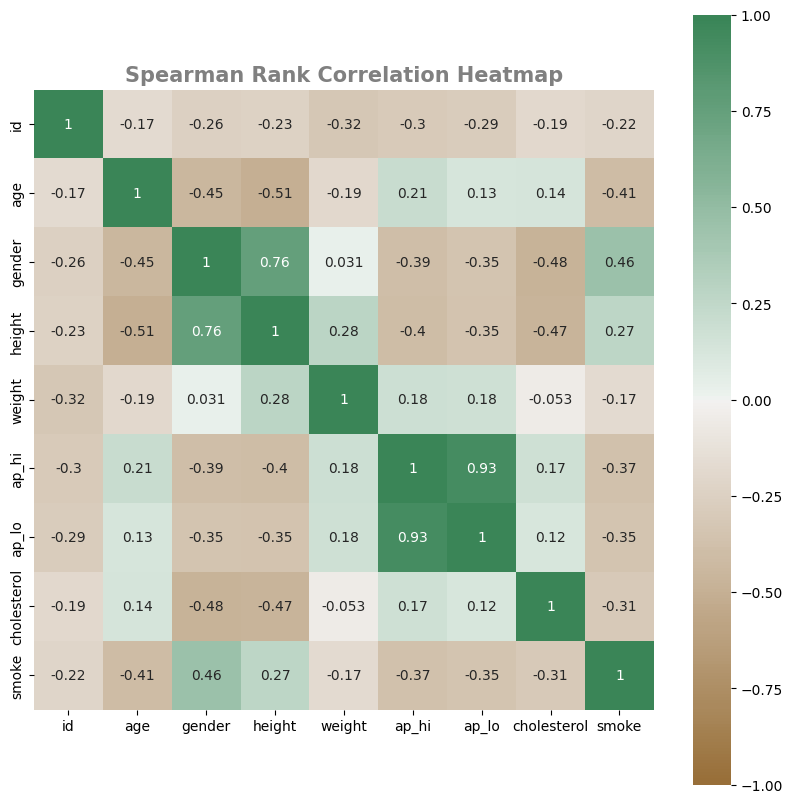

In [146]:
# Compute Spearman correlation matrix for numerical columns
spearman_corr = cardio_base_clean.corr(method='spearman')

# Find the pair with the highest absolute correlation (ignoring self-correlation)
abs_corr = spearman_corr.abs().unstack()
abs_corr = abs_corr[abs_corr != 1]  # Remove self-correlation
max_corr_pair = abs_corr.idxmax()  
max_corr_value = abs_corr.max()  

print(f"The features with the highest Spearman rank correlation are: {max_corr_pair}")
print(f"The Spearman rank correlation value is: {max_corr_value:.2f}")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10,10))
axis_corr = sns.heatmap(
spearman_corr.corr(),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True,
annot=True
)
plt.title("Spearman Rank Correlation Heatmap", fontsize=15, weight='bold', color='grey')
plt.show()

#### 6) % people that are more than 2 standard deviation far from the average height?

In [147]:


total_number_popu = len(cardio_base_clean.height)
ave_height = cardio_base_clean['height'].mean()
std_height = cardio_base_clean['height'].std()
std_2_avg = 2 * std_height

number_population_over_std_2_avg = len(cardio_base_clean[(cardio_base_clean['height'] - ave_height) > std_2_avg])

perc_number_population_over_std_2_avg = number_population_over_std_2_avg/total_number_popu

print(f'{perc_number_population_over_std_2_avg * 100:.2f}%')

2.06%


#### 7)  What percentage of the population over 50 years old consume alcohol? Ignore those persons, where we have no alcohol sonsumption information!

 4.91%


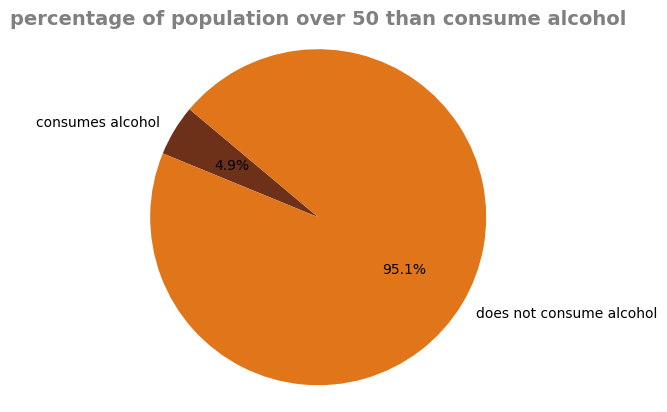

In [148]:
age_over_50 = merged_cardio[merged_cardio.age > 50]
total_age_over_50 = len(age_over_50)
total_taking_alcohol = len(age_over_50[age_over_50.alco == 1])
total_not_taking_alcohol_over_50 = len(age_over_50[age_over_50.alco == 0])
perc_over_50_taking_alco = (total_taking_alcohol/total_age_over_50) * 100
print(f"{perc_over_50_taking_alco: .2f}%")

## a pie chart to show relationship
plt.title('percentage of population over 50 than consume alcohol', fontsize=14, weight='bold', color='grey')
labels = ['consumes alcohol', 'does not consume alcohol']
sizes = [total_taking_alcohol, total_not_taking_alcohol_over_50 ]
colors = ['#6C3118', '#E07619']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

#### 8) Which of the following statements is true with 95% confidence?¶
- Smokers have higher blood pressure than non-smokers

- Smokers have higher cholesterol level than non-smokers

- Smokers weight less than non smokers

- Men have higher blood pressure than women¶

Confidence value expresses the % of times that the true parameter lies within a given range if it sampling process are repeated multiple times.(it is just a statistical way of saying are confidence are these the relationship among this variables)


To determine which statement is true with 95% confidence, we need to perform statistical tests (t-tests) to compare these variables between groups. Here's how I will check each statement

95% confidence means if you repeated the sampling many times, 95% of the intervals would contain the true population parameter

Higher confidence levels result in wider intervals

Lower confidence levels result in narrower intervals

It helps determine statistical significance (p < 0.05 corresponds to 95% confidence)

#### Approach

Perform statistical comparison between two groups.(smoke and gender) against (bp_mean, cholesterol, weight)
    
#### Parameters:

group_col: Column name for grouping ('smoke', 'gender')

value_col: Column name for the value to compare ('ap_hi', 'weight')
    
group1_val, group2_val: Values identifying the groups to compare







In [149]:
# create a column for the blood pressure using mean of ap_hi and ap_lo.
cardio_base_clean['bp_mean'] =  ((cardio_base_clean['ap_hi'] + cardio_base_clean['ap_lo']) / 2)

# define function
def calculate_confidence_interval_and_test(cardio_base_clean, group_col, value_col, group1_val, group2_val):
 
    # Get values for each group
    group1 = cardio_base_clean[cardio_base_clean[group_col] == group1_val][value_col]
    group2 = cardio_base_clean[cardio_base_clean[group_col] == group2_val][value_col]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    
    return {
        'mean_1': group1.mean(),
        'mean_2': group2.mean(),
        'difference': group1.mean() - group2.mean(),
        'p_value': p_value,
        'significant': p_value < 0.05
    }

# Perform all comparisons
comparisons = {
    'Blood Pressure (Smokers)': calculate_confidence_interval_and_test(cardio_base_clean, 'smoke', 'ap_hi', 1, 0),
    'Cholesterol (Smokers)': calculate_confidence_interval_and_test(cardio_base_clean, 'smoke', 'cholesterol', 1, 0),
    'Weight (Smokers)': calculate_confidence_interval_and_test(cardio_base_clean, 'smoke', 'weight', 1, 0),
    'Blood Pressure (Gender)': calculate_confidence_interval_and_test(cardio_base_clean, 'gender', 'ap_hi', 2, 1)  # 2=men, 1=women
}

for comparison, results in comparisons.items():
    print(f"\n{comparison}:")
    print(f"Difference: {results['difference']:.2f}")
    print(f"P-value: {results['p_value']:.4f}")
    print(f"Statistically significant: {'Yes' if results['significant'] else 'No'}")


Blood Pressure (Smokers):
Difference: -0.53
P-value: 0.4356
Statistically significant: No

Cholesterol (Smokers):
Difference: 0.02
P-value: 0.0063
Statistically significant: Yes

Weight (Smokers):
Difference: 3.44
P-value: 0.0000
Statistically significant: Yes

Blood Pressure (Gender):
Difference: 1.96
P-value: 0.0997
Statistically significant: No


(Confidence Level: 95%, α = 0.05)

Significant Findings:

Note: Other health parameters were excluded from this analysis as they did not meet the statistical significance threshold (p < 0.05).

1. Smoking and Cholesterol
   - Statistical Significance: Confirmed (p = 0.0063)
   - Directional Impact: Positive correlation
   - Magnitude: Smokers exhibit marginally higher cholesterol levels (mean difference: +0.02)

2. Smoking and Weight
   - Statistical Significance: Highly confirmed (p < 0.0001)
   - Directional Impact: Strong positive correlation
   - Magnitude: Smokers demonstrate substantially higher weight (mean difference: +3.44)

Interpretation of Mean Differences:
The mean difference serves as a quantitative indicator of the relationship's direction and strength between the "group" and health parameters. A positive difference indicates higher values in the specific group within the parameters, while a negative difference would suggest lower values.

Key Conclusion:
The analysis reveals statistically significant correlations between smoking and both cholesterol and weight parameters. Notably, the data contradicts the common perception that smoking leads to lower weight, instead showing a substantial positive relationship with both weight and cholesterol levels.


### ANSWER

For the sake of this question, the only correct answer using the analysis I have done is **"smokers have higher cholesterol level than non-smoker"**. 
Although, the result of the analysis shows that there is no much difference in the groups in this category. The mean cholesterol level for each smokers and non-smokers isn't signifance. The direction can't be ascertained with this dataset.

#### 9) When did the difference in total number of confirmed cases between italy and Germany become more than 10000?

On 2020-03-12, the cumulative difference reached 10,923 cases


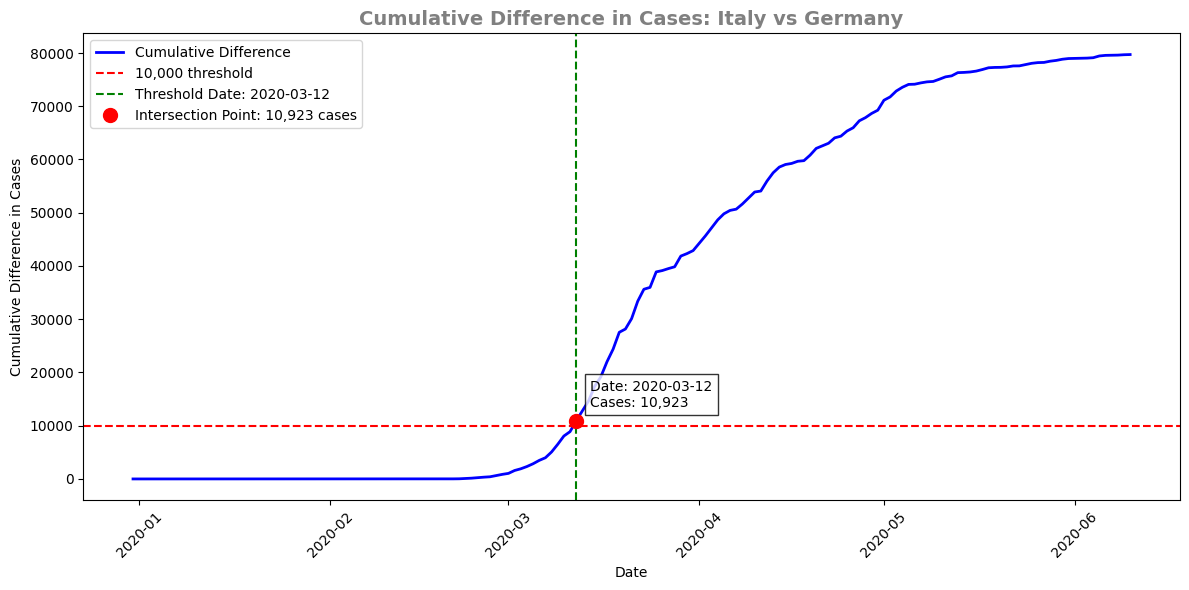

In [150]:
# filter data for italy and german
italy_data = covid_data_clean[covid_data_clean['location'] == 'Italy'].copy()
germany_data = covid_data_clean[covid_data_clean['location'] == 'Germany'].copy()

italy_germany_data = pd.merge(italy_data[['date', 'new_cases']], 
                            germany_data[['date', 'new_cases']], 
                            on='date', # table will be sorted by date column
                            suffixes=('_italy', '_germany'))

italy_germany_data['date'] = italy_germany_data['date'].dt.date
italy_germany_data['cummulative_case_diff'] = abs(italy_germany_data['new_cases_germany'] - italy_germany_data['new_cases_italy']).cumsum()

# first date when the cummulative_case_diff > 10000
threshold_date = italy_germany_data[italy_germany_data['cummulative_case_diff'] > 10000].iloc[0]

print(f"On {threshold_date['date']}, the cumulative difference reached {int(threshold_date['cummulative_case_diff']):,} cases")

# Create the line plot showing details of this analysis
plt.figure(figsize=(12, 6))
plt.plot(italy_germany_data['date'], italy_germany_data['cummulative_case_diff'], 
        color='blue', linewidth=2, label='Cumulative Difference')
plt.axhline(y=10000, color='r', linestyle='--', label='10,000 threshold')
plt.axvline(x=threshold_date['date'], color='g', linestyle='--', label=f'Threshold Date: {threshold_date["date"]}')
plt.plot(threshold_date['date'], threshold_date['cummulative_case_diff'], 'ro', 
        markersize=10, label=f'Intersection Point: {int(threshold_date["cummulative_case_diff"]):,} cases')
plt.annotate(f'Date: {threshold_date["date"]}\nCases: {int(threshold_date["cummulative_case_diff"]):,}', 
            xy=(threshold_date['date'], threshold_date['cummulative_case_diff']),
            xytext=(10, 10), textcoords='offset points',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))
plt.title('Cumulative Difference in Cases: Italy vs Germany', fontsize=14, weight='bold', color='grey')
plt.xlabel('Date')
plt.ylabel('Cumulative Difference in Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### 10) Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

In [151]:
# Filter data and create days array for cumulative cases
italy_data = covid_data_clean[
   (covid_data_clean['location'] == 'Italy') & 
   (covid_data_clean['date'].between('2020-02-28', '2020-03-20'))
].copy()

# Calculate cumulative cases and days
italy_data['cumulative_cases'] = italy_data['new_cases'].cumsum()
italy_data['days'] = (italy_data['date'] - italy_data['date'].min()).dt.days

# define function and fit exponential curve (squared loss is default in curve_fit)
def exp_func(x, A, B): 
   return A * np.exp(B * x)
A, B = curve_fit(exp_func, italy_data['days'], italy_data['cumulative_cases'])[0]

# Calculate predictions and difference
y_pred = exp_func(italy_data['days'], A, B)
last_day = italy_data.iloc[-1]
actual_cases = last_day['cumulative_cases']
predicted_cases = exp_func(last_day['days'], A, B)
difference = last_day['cumulative_cases'] - exp_func(last_day['days'], A, B)

print(f'result = {abs(difference)}')
print(f'============================================================\nfor better clarity I will visualize the result of this analysis' )

result = 1711.692671692661
for better clarity I will visualize the result of this analysis


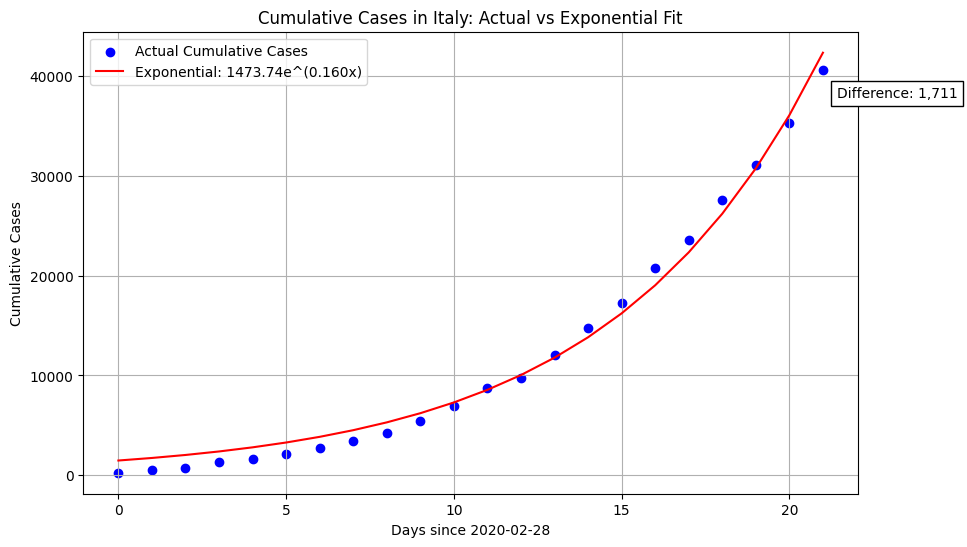

Exponential function: y = 1473.74e^(0.160x)
Actual cumulative cases on 2020-03-20: 40,635
Predicted cases on 2020-03-20: 42,346
Absolute difference: 1,711 cases


In [152]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(italy_data['days'], italy_data['cumulative_cases'], label='Actual Cumulative Cases', color='blue')
plt.plot(italy_data['days'], y_pred, label=f'Exponential: {A:.2f}e^({B:.3f}x)', color='red')
plt.annotate(f'Difference: {int(abs(difference)):,}', 
            xy=(last_day['days'], last_day['cumulative_cases']),
            xytext=(10, -20), textcoords='offset points',
            bbox=dict(facecolor='white', edgecolor='black'))

plt.title('Cumulative Cases in Italy: Actual vs Exponential Fit')
plt.xlabel('Days since 2020-02-28')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.grid(True)
plt.show()

print(f"Exponential function: y = {A:.2f}e^({B:.3f}x)")
print(f"Actual cumulative cases on 2020-03-20: {int(italy_data.iloc[-1]['cumulative_cases']):,}")
print(f"Predicted cases on 2020-03-20: {int(predicted_cases):,}")
print(f"Absolute difference: {int(abs(difference)):,} cases")

#### 11) Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants?

In [153]:
covid_data_clean['total_death'] = covid_data_clean['new_deaths'].cumsum() 

# Calculate death rate (deaths per million)
covid_data_death_rate = covid_data_clean.groupby('location').agg({
   'new_deaths': 'sum',  # get sum total deaths
   'population': 'mean',   # get population (only need one value)
   'aged_65_older_percent': 'first'
}).eval('death_rate_per_million = new_deaths * 1000000 / population')\
   .sort_values('death_rate_per_million', ascending=False)[1:]

# Get 3rd highest country
third_highest = covid_data_death_rate['death_rate_per_million'].iloc[3]
country = covid_data_death_rate.index[3]

print(f"The country with the 3rd highest death rate is {country} with {third_highest:.2f} deaths per million")

# Show top 5 for context
print("\nTop 5 Countries by Death Rate (deaths per million):")
for i, (loc, row) in enumerate(covid_data_death_rate.head().iterrows(), 1):
   print(f"{i}. {loc}: {row['death_rate_per_million']:.2f}")

The country with the 3rd highest death rate is Spain with 612.64 deaths per million

Top 5 Countries by Death Rate (deaths per million):
1. San Marino: 1237.55
2. Belgium: 829.97
3. Andorra: 660.07
4. Spain: 612.64
5. United Kingdom: 596.88


#### 12) What is the F1 score of the following statement: 

Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. 

Ignore countries, where any of the neccessary information is missing!

In [154]:

# Filter out countries with missing information
death_rate_dropna = covid_data_death_rate.dropna(subset=['aged_65_older_percent', 'death_rate_per_million']).copy()

# Define conditions
death_rate_dropna.loc[:, 'true_class'] = death_rate_dropna['aged_65_older_percent'] > 20
death_rate_dropna.loc[:,'predicted_class'] = death_rate_dropna['death_rate_per_million'] > 50

# Calculate True Positives, False Positives, False Negatives
TP = ((death_rate_dropna['true_class'] == True) & (death_rate_dropna['predicted_class'] == True)).sum()
FP = ((death_rate_dropna['true_class'] == False) & (death_rate_dropna['predicted_class'] == True)).sum()
FN = ((death_rate_dropna['true_class'] == True) & (death_rate_dropna['predicted_class'] == False)).sum()

# Calculate Precision and Recall
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0





print(f'F1 Score: {f1_score}')


F1 Score: 0.18181818181818182


In [155]:
# Filter rows where both 'true_class' and 'predicted_class' are True
death_rate_f1 = death_rate_dropna.loc[(death_rate_dropna['true_class'] == True) & (death_rate_dropna['predicted_class'] == True)]


In [156]:
death_rate_f1

,new_deaths,population,aged_65_older_percent,death_rate_per_million,true_class,predicted_class
location,,,,,,
Italy,34043,60461828.0,23.021,563.049467,True,True
Portugal,1476,10196707.0,21.502,144.752615,True,True
Germany,8729,83783945.0,21.453,104.184638,True,True
Finland,324,5540718.0,21.228,58.476176,True,True


In [157]:
country_aged_65_over_20_percent = death_rate_dropna[death_rate_dropna.aged_65_older_percent > 20]
country_aged_65_over_20_percent

,new_deaths,population,aged_65_older_percent,death_rate_per_million,true_class,predicted_class
location,,,,,,
Italy,34043,60461828.0,23.021,563.049467,True,True
Portugal,1476,10196707.0,21.502,144.752615,True,True
Germany,8729,83783945.0,21.453,104.184638,True,True
Finland,324,5540718.0,21.228,58.476176,True,True
Bulgaria,167,6948445.0,20.801,24.034154,True,False
Greece,183,10423056.0,20.396,17.557231,True,False
Japan,919,126476458.0,27.049,7.266174,True,False


In [158]:
country_aged_65_over_20_percent_death_rate_over_50_per_million = country_aged_65_over_20_percent[country_aged_65_over_20_percent.death_rate_per_million > 50]
country_aged_65_over_20_percent_death_rate_over_50_per_million

,new_deaths,population,aged_65_older_percent,death_rate_per_million,true_class,predicted_class
location,,,,,,
Italy,34043,60461828.0,23.021,563.049467,True,True
Portugal,1476,10196707.0,21.502,144.752615,True,True
Germany,8729,83783945.0,21.453,104.184638,True,True
Finland,324,5540718.0,21.228,58.476176,True,True


In [159]:
from sklearn.metrics import f1_score

# Total countries meeting the age condition
total = len(country_aged_65_over_20_percent)

# True labels: 1 for countries meeting both conditions, 0 for others
y_true = [1] * len(country_aged_65_over_20_percent_death_rate_over_50_per_million) + \
         [0] * (total - len(country_aged_65_over_20_percent_death_rate_over_50_per_million))

# Predicted labels: all set to 1, as we assume all aged countries have high death rates
y_pred = [1] * total

# Calculate the F1 score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1}")


F1 Score: 0.7272727272727273


#### 13) What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants

In [165]:
## group df on location, aggregate on gbp_per_capita and hospital_bed
atleast_5_hospital_beds_per_1000 = covid_data_clean.query(
    'hospital_beds_per_thousand >= 5').dropna().groupby('location').agg(
    {'gdp_per_capita':'mean','hospital_beds_per_thousand': 'first'})
print(atleast_5_hospital_beds_per_1000)
probability_atleast = len(atleast_5_hospital_beds_per_1000.query(
    'gdp_per_capita > 10000')) / len(atleast_5_hospital_beds_per_1000)

print(f"\n\n\bThe probability that a country has GDP over $10,000 given they have at least 5 hospital beds per 1,000 inhabitants is {probability_atleast:.2f}")


                gdp_per_capita  hospital_beds_per_thousand
location                                                  
Argentina            18933.907                       5.000
Austria              45436.686                       7.370
Barbados             16978.068                       5.800
Belarus              17167.967                      11.000
Belgium              42658.576                       5.640
Bulgaria             18563.307                       7.454
Croatia              22669.797                       5.540
Czech Republic       32605.906                       6.630
France               38605.671                       5.980
Gabon                16562.413                       6.300
Germany              45229.245                       8.000
Hungary              26777.561                       7.020
Japan                39002.223                      13.050
Kazakhstan           24055.588                       6.700
Latvia               25063.846                       5.5

In [ ]:
import plotly.express as px

# Create the map using Plotly Express
fig = px.choropleth(
    atleast_5_hospital_beds_per_1000,
    locations="iso_alpha",
    locationmode="ISO-3",
    color="gdp_per_capita",
    hover_name="location",
    hover_data={
        "gdp_per_capita": ":,.2f",
        "hospital_beds_per_thousand": ":,.1f",
        "iso_alpha": False  # Hide the ISO code from the tooltip
    },
    labels={'gdp_per_capita': 'GDP per Capita ($)'},
    title="GDP per Capita and Hospital Beds per Thousand by Country"
)

# Adding hospital beds per thousand as a hover data variable
fig.update_traces(marker=dict(line=dict(color='#fff', width=0.5)))

# Show the plot
fig.show()